<a href="https://colab.research.google.com/github/soholade/Capstone-Project-Fraud-Detection-and-Customer-Analysis-in-E-commerce/blob/main/Logistic_Regression_Model_for_Predicting_Fraudulent_E_Commerce_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting fraudulent e-commerce transactions using logistic regression**

***What is this project trying to achieve?***

The objective is to create a logistic regression model that would predict whether a purchase made online is fraudulent or legitimate. The dataset used is synthetically engineered, provides transaction data from an e-commerce platform with a focus on fraud detection and includes over 23,000 records and 16 attributes (dataset source: https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions).

***Dataset attributes:***

*Variables:*
*   Transaction ID: A unique identifier for each transaction;
*   Customer ID: A unique identifier for each customer;
*   Transaction Amount: The total amount of money exchanged in the transaction;
*   Transaction Date: The date and time when the transaction took place.
*   Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.);
*   Product Category: The category of the product involved in the transaction;
*   Quantity: The number of products involved in the transaction;
*   Customer Age: The age of the customer making the transaction;
*   Customer Location: The geographical location of the customer;
*  Device Used: The type of device used to make the transaction (e.g., mobile, desktop);
*   IP Address: The IP address of the device used for the transaction;
*   Shipping Address: The address where the product was shipped;
*   Billing Address: The address associated with the payment method;
*   Account Age Days: The age of the customer's account in days at the time of the transaction;
*   Transaction Hour: The hour of the day when the transaction occurred..

*Predict variable (desired target):*
*   Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

***Working on the logistic regression model***

**1. Loading the dataset**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gs = gspread.authorize(creds)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve

worksheet = gs.open('Fraudulent_E-Commerce_Transaction_Data_2').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

#creating DataFrame from rows
fraud_detection = pd.DataFrame.from_records(rows[1:], columns=rows[0])
fraud_detection.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,24/03/2024 23:42,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,22/01/2024 00:53,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,22/01/2024 08:06,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,16/01/2024 20:34,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,16/01/2024 15:47,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,0,116,15


**2. Exploring the dataset**

*2.1. Renaming the columns*

In [ ]:
dict = {'Transaction ID': 'TransactionID',
        'Customer ID': 'CustomerID',
        'Transaction Amount': 'TransactionAmount',
        'Transaction Date': 'TransactionDate',
        'Payment Method': 'PaymentMethod',
        'Product Category': 'ProductCategory',
        'Customer Age': 'CustomerAge',
        'Customer Location': 'CustomerLocation',
        'Device Used': 'DeviceUsed',
        'IP Address': 'IPAddress',
        'Is Fraudulent': 'IsFraudulent',
        'Account Age Days': 'AccountAgeDays',
        'Transaction Hour': 'TransactionHour'}

fraud_detection.rename(columns=dict,
          inplace=True)

*2.2. Checking how many transactions in the dataset are fraudulent*


In [ ]:
fraud_detection['IsFraudulent'].value_counts()

IsFraudulent
0    22412
1     1222
Name: count, dtype: int64

<Axes: xlabel='IsFraudulent', ylabel='count'>

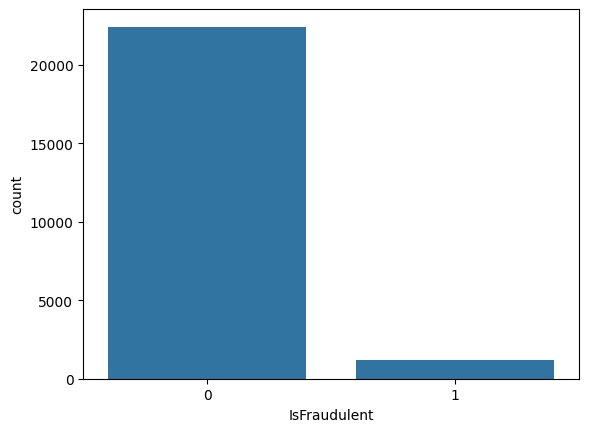

In [ ]:
sns.countplot(x='IsFraudulent', data=fraud_detection)

**3. Cleaning the data**

*3.1. Dropping unique values*



In [ ]:
fraud_detection.drop('TransactionID', axis=1, inplace=True)
fraud_detection.drop('CustomerID', axis=1, inplace=True)
fraud_detection.drop('CustomerLocation', axis=1, inplace=True)
fraud_detection.drop('IPAddress', axis=1, inplace=True)
fraud_detection.head()

,TransactionAmount,TransactionDate,PaymentMethod,ProductCategory,Quantity,CustomerAge,DeviceUsed,IsFraudulent,AccountAgeDays,TransactionHour
0,42.32,24/03/2024 23:42,PayPal,electronics,1,40,desktop,0,282,23
1,301.34,22/01/2024 00:53,credit card,electronics,3,35,tablet,0,223,0
2,340.32,22/01/2024 08:06,debit card,toys & games,5,29,desktop,0,360,8
3,95.77,16/01/2024 20:34,credit card,electronics,5,45,mobile,0,325,20
4,77.45,16/01/2024 15:47,credit card,clothing,5,42,desktop,0,116,15


*3.2. Checking for null values*

In [ ]:
fraud_detection.isnull().sum()

TransactionAmount    0
TransactionDate      0
PaymentMethod        0
ProductCategory      0
Quantity             0
CustomerAge          0
DeviceUsed           0
IsFraudulent         0
AccountAgeDays       0
TransactionHour      0
dtype: int64

*3.3. Exploring attributes with named values*

In [ ]:
fraud_detection.PaymentMethod.value_counts()

PaymentMethod
debit card       5952
credit card      5923
PayPal           5899
bank transfer    5860
Name: count, dtype: int64

In [ ]:
fraud_detection.ProductCategory.value_counts()

ProductCategory
home & garden      4786
electronics        4748
toys & games       4730
clothing           4699
health & beauty    4671
Name: count, dtype: int64

In [ ]:
fraud_detection.DeviceUsed.value_counts()

DeviceUsed
desktop    7923
mobile     7881
tablet     7830
Name: count, dtype: int64

*3.4. Changing named attribute's values to numerical*

In [ ]:
fraud_detection["PaymentMethod"] = fraud_detection["PaymentMethod"].astype(str)
fraud_detection["PaymentMethod"] = fraud_detection["PaymentMethod"].map({"debit card": 1, "credit card": 2, "PayPal": 3, "bank transfer": 4})

fraud_detection["ProductCategory"] = fraud_detection["ProductCategory"].astype(str)
fraud_detection["ProductCategory"] = fraud_detection["ProductCategory"].map({"home & garden": 1, "electronics": 2, "toys & games": 3, "clothing": 4, "health & beauty": 5})

fraud_detection["DeviceUsed"] = fraud_detection["DeviceUsed"].astype(str)
fraud_detection["DeviceUsed"] = fraud_detection["DeviceUsed"].map({"desktop": 1, "mobile": 2, "tablet": 3})

*3.5. Converting purchase dates to months*: 1 meaning January, 2 - February, etc.


In [ ]:
fraud_detection['TransactionMonth'] = pd.to_datetime(fraud_detection['TransactionDate'].str[:10], format='%d/%m/%Y').dt.month

del fraud_detection['TransactionDate']

fraud_detection.head()

,TransactionAmount,PaymentMethod,ProductCategory,Quantity,CustomerAge,DeviceUsed,IsFraudulent,AccountAgeDays,TransactionHour,TransactionMonth
0,42.32,3,2,1,40,1,0,282,23,3
1,301.34,2,2,3,35,3,0,223,0,1
2,340.32,1,3,5,29,1,0,360,8,1
3,95.77,2,2,5,45,2,0,325,20,1
4,77.45,2,4,5,42,1,0,116,15,1


*3.6. Checking for correlation*

In [ ]:
#handling the odd singular -2 value in the CustomerAge column
fraud_detection['CustomerAge'] = pd.to_numeric(fraud_detection['CustomerAge'], errors='coerce')
fraud_detection['CustomerAge'].replace({'-2': np.nan, 'abc': np.nan}, inplace=True)
fraud_detection.dropna(subset=['CustomerAge'], inplace=True)

correlation = fraud_detection.corr()
print(correlation["IsFraudulent"].sort_values(ascending=False))

IsFraudulent         1.000000
TransactionAmount    0.275458
PaymentMethod        0.012613
CustomerAge          0.004784
ProductCategory      0.002369
DeviceUsed          -0.003334
TransactionMonth    -0.004162
Quantity            -0.005340
TransactionHour     -0.122222
AccountAgeDays      -0.142461
Name: IsFraudulent, dtype: float64


**4. Creating the logistic regression model**

In [ ]:
x = fraud_detection.drop(columns='IsFraudulent', axis=1)
y = fraud_detection['IsFraudulent'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

x.shape, x_train.shape, x_test.shape

((23633, 9), (18906, 9), (4727, 9))

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

*4.1. Using the training dataset*

In [ ]:
train_prediction = model.predict(x_train)
print("Accuracy Score:", accuracy_score(y_train, train_prediction))
print("Precision Score:", precision_score(y_train, train_prediction, pos_label='1'))
print("Recall Score:", recall_score(y_train, train_prediction, pos_label='1'))
print("F1 score:", f1_score(y_train, train_prediction, pos_label='1'))

Accuracy Score: 0.9540357558447053
Precision Score: 0.8562091503267973
Recall Score: 0.13394683026584867
F1 score: 0.23165340406719717


In [ ]:
confusion_matrix_train = confusion_matrix(y_train, train_prediction)

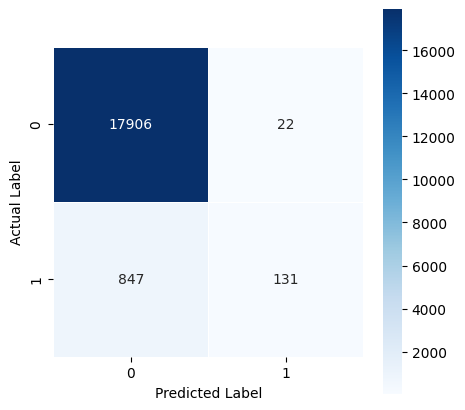

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_train, annot=True,
            fmt=".0f",
            linewidths=.5,
            square=True,
            cmap='Blues');
plt.ylabel('Actual Label', fontsize = 10);
plt.xlabel('Predicted Label', fontsize = 10);
plt.tick_params(labelsize = 10)

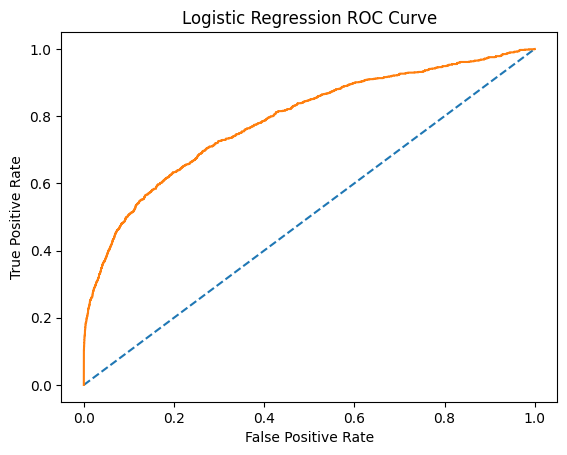

In [ ]:
y_pred_probs_train = model.predict_proba(x_train)[:,1]
y_pred_probs_train[0]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_probs_train, pos_label='1')

plt.plot([0,1], [0,1], '--')
plt.plot(fpr_train, tpr_train)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

*4.2. Using the testing dataset*

In [ ]:
#using the testing dataset

test_prediction = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, test_prediction))
print("Precision Score:", precision_score(y_test, test_prediction, pos_label='1'))
print("Recall Score:", recall_score(y_test, test_prediction, pos_label='1'))
print("F1 score:", f1_score(y_test, test_prediction, pos_label='1'))

Accuracy Score: 0.9513433467315422
Precision Score: 0.75
Recall Score: 0.0860655737704918
F1 score: 0.15441176470588236


In [ ]:
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

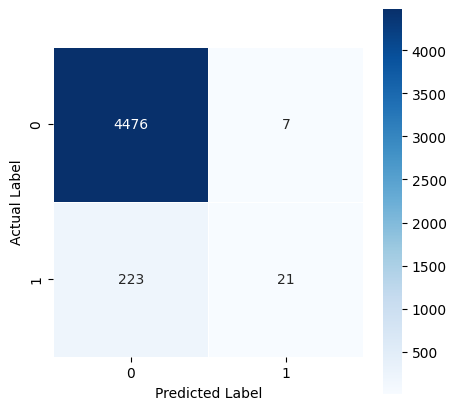

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_test, annot=True,
            fmt=".0f",
            linewidths=.5,
            square=True,
            cmap='Blues');
plt.ylabel('Actual Label', fontsize = 10);
plt.xlabel('Predicted Label', fontsize = 10);
plt.tick_params(labelsize = 10)

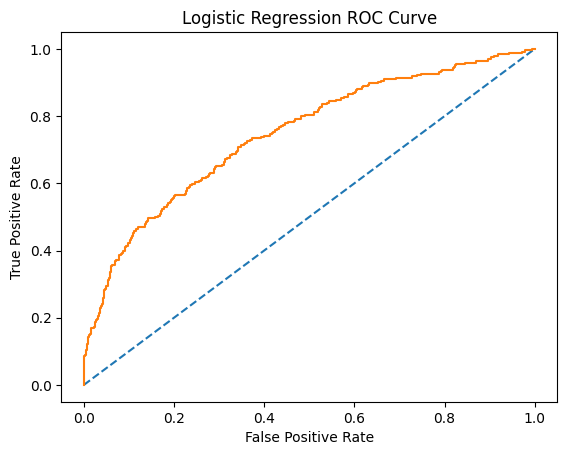

In [ ]:
y_pred_probs_test = model.predict_proba(x_test)[:,1]
y_pred_probs_test[0]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_probs_test, pos_label='1')

plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test, tpr_test)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

*4.3. Building a predictive system*

In [ ]:
#first example taken from the existing dataset, the transaction already known to be not fraudulent
input_data = (42.32, 3, 2, 1, 40, 1, 282, 23, 3)

#changing input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array (in order to predict only one instance/case)
reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)

#making the prediction
prediction = model.predict(reshaped_input_data)

if prediction == ['1']:
  print('The transaction is fraudulent.')
else:
  print('The transaction is not fraudulent.')

The transaction is not fraudulent.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


***Conclusions***

The dataset is overall quite significantly imbalanced (class split between people with fraudulent transactions is not 50/50, but about 95/5, with ~95% of the transactions not being fraudulent).
1. In the context of fraudulent transactions, accuracy is less important and precision or recall can be prioritised based on the specific implications of false positives and false negatives:
*   If false positives are costly or have serious consequences (for example, unnecessarily flagging customers' accounts as fraudulent may lose sales), then prioritise precision;
*    If false negatives are costly or have serious consequences (for example, discouraging fraudsters or reducing financial losses), then prioritise recall.
2. This model's **accuracy score** is about **95%**, meaning the model correctly predicts the outcome 95% of the time. While this seems high, accuracy alone can be misleading, especially in imbalanced datasets where one class significantly outnumbers the other (which this dataset is).
3. The model's **precision score** is  about **80%**. This indicates that when the model predicts an instance as positive, it is correct about 80% of the time. A high precision score is particularly important in applications where the cost of false positives is high.
4. This model's **recall score** is about **10%**. This metric tells us that the model is only able to correctly identify approximately 10% of all actual positive cases. This low recall indicates that the model is highly conservative in predicting positives, leading to a high number of false negatives.
3. Overall, the scores suggest a model that is highly precise but with poor recall. This means the model is very accurate when it predicts an instance is positive but fails to identify the majority of positive instances. The high accuracy might be misleading due to the imbalance in the dataset, making it a less reliable indicator of the model's performance in this context.
*NOTE: The trade-off between precision and recall may need to be adjusted depending on the specific goals and requirements of the model's application which during the making of the model were unknown, therefore, some liberties by the creator had to be taken.*